In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import pearsonr
import matplotlib.lines as mlines
from matplotlib.ticker import PercentFormatter


In [ ]:
seasons = ["spring","summer","autumn","winter"]
### PRIOR
prior_lst = []
for season in seasons:
    file = f"simulation/{season}_prior.nc"
    ds = xr.open_dataset(file)
    ds = ds.where(ds.longitude != ds.longitude[18]).dropna(dim="longitude", how="all")
    prior_lst.append(ds.skt.values)
ds_prior = xr.Dataset(
    data_vars=dict(
        lst=(["latitude", "longitude", "season"], np.stack(prior_lst,axis=2)),   
    ),
    coords=dict(
        longitude=("longitude", ds.longitude.values),
        latitude=("latitude", ds.latitude.values),
        season=("season", seasons),
    ),
)

### TRUTH
true_lst = []
true_tcwv = []
for season in seasons:
    file = f"/simulation/{season}_point.nc"
    ds = xr.open_dataset(file)
    true_lst.append(ds.skt.values)
    true_tcwv.append(ds.tcwv.values)
ds_true = xr.Dataset(
    data_vars=dict(
        lst=(["latitude", "longitude", "season"], np.stack(true_lst,axis=2)),
        tcwv=(["latitude", "longitude", "season"], np.stack(true_tcwv,axis=2)), 
    ),
    coords=dict(
        longitude=("longitude", ds.longitude.values),
        latitude=("latitude", ds.latitude.values),
        season=("season", seasons),
    ),
)


In [ ]:
## TRUE LSE
urb_true = pd.read_csv("/simulation/urb_truth.csv")
sar_true = pd.read_csv("/simulation/sar_truth.csv")
ln_veg_true = pd.read_csv("/simulation/ln_veg_truth.csv")
mn_veg_true = pd.read_csv("/simulation/mn_veg_truth.csv")
hn_veg_true = pd.read_csv("/simulation/hn_veg_truth.csv")

In [4]:
examples = [
    "Masonry m.cap-Natural",
    "Construction  Concrete",
    "B001",
    "Brown to dark brown gravelly loam",
    "Red-orange sandy soil.",
    "Sand Sample 1 from Orchard Supply Hardware",
    "Ceanothus spinosus 1",
    "Leaf of Laurel (Fresh)",
    "Acer pensylvanicum",
]

In [5]:
for i in examples:
    u = urb_true[(urb_true["Material_Name"] == i)].index.values
    if u.any():
        print("urb",i,u)
    s = sar_true[(sar_true["Material_Name"] == i)].index.values
    if s.any():
        print("sar",i,s)
    l = ln_veg_true[(ln_veg_true["Material_Name"] == i)].index.values
    if l.any():
        print("ln_veg",i,l)
    m = mn_veg_true[(mn_veg_true["Material_Name"] == i)].index.values
    if m.any():
        print("mn_veg",i,m)

urb Masonry m.cap-Natural [60]
urb Construction  Concrete [ 8 34]
urb B001 [68]
sar Brown to dark brown gravelly loam [6]
sar Red-orange sandy soil. [14]
sar Sand Sample 1 from Orchard Supply Hardware [80]
ln_veg Ceanothus spinosus 1 [23 28 59 60]
mn_veg Leaf of Laurel (Fresh) [44]
ln_veg Acer pensylvanicum [108]


In [ ]:
summer_urb = xr.open_dataset("/simulation/summer_urb_ret.nc")
summer_sar = xr.open_dataset("/simulation/summer_sar_ret.nc")
summer_ln_veg = xr.open_dataset("/simulation/summer_ln_veg_ret.nc")
summer_mn_veg = xr.open_dataset("/simulation/summer_mn_veg_ret.nc")
summer_hn_veg = xr.open_dataset("/simulation/summer_hn_veg_ret.nc")

spring_urb = xr.open_dataset("/simulation/spring_urb_ret.nc")
spring_sar = xr.open_dataset("/simulation/spring_sar_ret.nc")
spring_ln_veg = xr.open_dataset("/simulation/spring_ln_veg_ret.nc")
spring_mn_veg = xr.open_dataset("/simulation/spring_mn_veg_ret.nc")
spring_hn_veg = xr.open_dataset("/simulation/spring_hn_veg_ret.nc")

autumn_urb = xr.open_dataset("/simulation/autumn_urb_ret.nc")
autumn_sar = xr.open_dataset("/simulation/autumn_sar_ret.nc")
autumn_ln_veg = xr.open_dataset("/simulation/autumn_ln_veg_ret.nc")
autumn_mn_veg = xr.open_dataset("/simulation/autumn_mn_veg_ret.nc")
autumn_hn_veg = xr.open_dataset("/simulation/autumn_hn_veg_ret.nc")

winter_urb = xr.open_dataset("/simulation/winter_urb_ret.nc")
winter_sar = xr.open_dataset("/simulation/winter_sar_ret.nc")
winter_ln_veg = xr.open_dataset("/simulation/winter_ln_veg_ret.nc")
winter_mn_veg = xr.open_dataset("/simulation/winter_mn_veg_ret.nc")
winter_hn_veg = xr.open_dataset("/simulation/winter_hn_veg_ret.nc")



In [7]:
spring_all = xr.concat([spring_urb,spring_sar,spring_ln_veg,spring_mn_veg,spring_hn_veg],dim="sample")
summer_all = xr.concat([summer_urb,summer_sar,summer_ln_veg,summer_mn_veg,summer_hn_veg],dim="sample")
autumn_all = xr.concat([autumn_urb,autumn_sar,autumn_ln_veg,autumn_mn_veg,autumn_hn_veg],dim="sample")
winter_all = xr.concat([winter_urb,winter_sar,winter_ln_veg,winter_mn_veg,winter_hn_veg],dim="sample")

In [8]:
lst_array = np.full((12,34,summer_all.sample.size,4),np.nan)
for i in range(summer_all.sample.size):
        lst_array[:,:,i,0] = spring_all.isel(sample=i).lst - ds_true.sel(season="spring").lst
        lst_array[:,:,i,1] = summer_all.isel(sample=i).lst - ds_true.sel(season="summer").lst
        lst_array[:,:,i,2] = autumn_all.isel(sample=i).lst - ds_true.sel(season="autumn").lst
        lst_array[:,:,i,3] = winter_all.isel(sample=i).lst - ds_true.sel(season="winter").lst

/local/mp317/ipykernel_1098199/3893542814.py:2: RuntimeWarning: All-NaN slice encountered
  y=np.nanmedian(lst_array,axis=2).flatten()


Text(0.5, 0, 'True LST [K]')

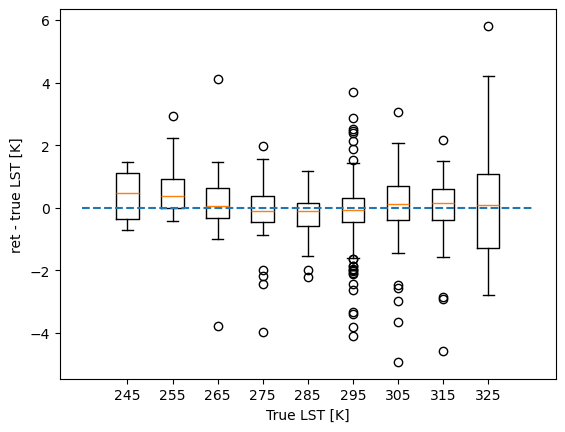

In [9]:
x=ds_true.lst.values.flatten()
y=np.nanmedian(lst_array,axis=2).flatten()
bad_indices = np.isnan(x) | np.isnan(y)
good_indices = ~bad_indices
good_x = x[good_indices]
good_y = y[good_indices]
data = []
labels =[]
bands=[240,250,260,270,280,290,300,310,320,330]

for i in range(9):
    labels.append(f"{bands[i]+5}")
    data.append(good_y[(good_x > bands[i])&(good_x <= bands[i+1])])
plt.boxplot(data,tick_labels=labels)
plt.plot([0,10],[0,0],"--")
plt.ylabel("ret - true LST [K]")
plt.xlabel("True LST [K]")




/local/mp317/ipykernel_1098199/2389376500.py:2: RuntimeWarning: All-NaN slice encountered
  y=np.nanmedian(lst_array,axis=2).flatten()


Text(0.5, 0, 'True TCWV [ppmv]')

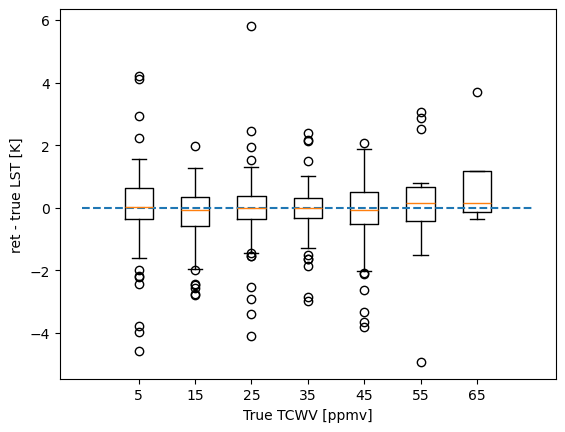

In [10]:
x=ds_true.tcwv.values.flatten()
y=np.nanmedian(lst_array,axis=2).flatten()
bad_indices = np.isnan(x) | np.isnan(y)
good_indices = ~bad_indices
good_x = x[good_indices]
good_y = y[good_indices]


data = []
labels =[]
bands=[0,10,20,30,40,50,60,70]

for i in range(7):
    labels.append(f"{bands[i]+5}")
    data.append(good_y[(good_x > bands[i])&(good_x <= bands[i+1])])
plt.boxplot(data,tick_labels=labels)
plt.plot([0,8],[0,0],"--")
plt.ylabel("ret - true LST [K]")
plt.xlabel("True TCWV [ppmv]")


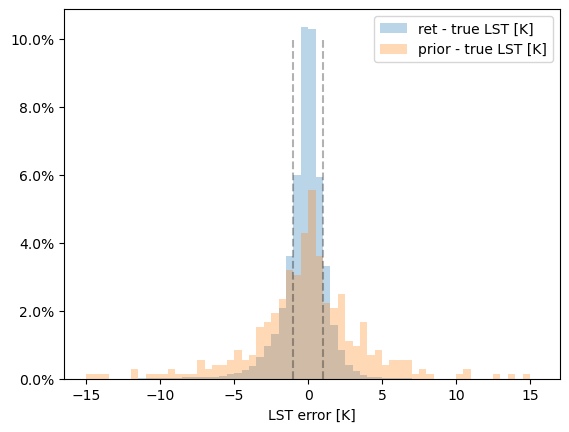

In [14]:

bins=np.arange(-15,16,0.5)
data1 = lst_array.flatten()
data2 = (ds_prior.lst-ds_true.lst).values.flatten()

plt.hist(data1,weights=np.ones(len(data1)) / len(data1),bins=bins,alpha=0.3,label="ret - true LST [K]") 
plt.hist(data2,weights=np.ones(len(data2)) / len(data2),bins=bins,alpha=0.3,label="prior - true LST [K]")
plt.plot([-1,-1],[0,0.1],"--",color="black",alpha=0.3)
plt.plot([1,1],[0,0.1],"--",color="black",alpha=0.3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("LST error [K]")
plt.legend()

In [15]:

all_d = np.count_nonzero(~np.isnan(data1))
low_d_1 = np.count_nonzero((data1 > -1)&(data1 < 1))
low_d_15 = np.count_nonzero((data1 > -1.5)&(data1 < 1.5))
low_d_2 = np.count_nonzero((data1 > -2)&(data1 < 2))
print((low_d_1 / all_d)*100.00)
print((low_d_2 / all_d)*100.00)

all_p = np.count_nonzero(~np.isnan(data2))
low_p_1 = np.count_nonzero((data2 > -1)&(data2 < 1))
low_p_15 = np.count_nonzero((data2 > -1.5)&(data2 < 1.5))
low_p_2 = np.count_nonzero((data2 > -2)&(data2 < 2))
print((low_p_1 / all_p)*100.00)
print((low_p_2 / all_p)*100.00)

66.20558024331609
87.70394113790341
33.42696629213483
53.37078651685393


In [17]:
urb_all = np.stack([spring_urb.lse.values,summer_urb.lse.values,autumn_urb.lse.values,winter_urb.lse.values],axis=4)
sar_all = np.stack([spring_sar.lse.values,summer_sar.lse.values,autumn_sar.lse.values,winter_sar.lse.values],axis=4)
ln_veg_all = np.stack([spring_ln_veg.lse.values,summer_ln_veg.lse.values,autumn_ln_veg.lse.values,winter_ln_veg.lse.values],axis=4)
mn_veg_all = np.stack([spring_mn_veg.lse.values,summer_mn_veg.lse.values,autumn_mn_veg.lse.values,winter_mn_veg.lse.values],axis=4)
hn_veg_all = np.stack([spring_hn_veg.lse.values,summer_hn_veg.lse.values,autumn_hn_veg.lse.values,winter_hn_veg.lse.values],axis=4)

In [18]:
urb_med = np.nanmedian(urb_all,axis=(0,1,4))
urb_std = np.nanstd(urb_all,axis=(0,1,4))

sar_med = np.nanmedian(sar_all,axis=(0,1,4))
sar_std = np.nanstd(sar_all,axis=(0,1,4))

ln_veg_med = np.nanmedian(ln_veg_all,axis=(0,1,4))
ln_veg_std = np.nanstd(ln_veg_all,axis=(0,1,4))

mn_veg_med = np.nanmedian(mn_veg_all,axis=(0,1,4))
mn_veg_std = np.nanstd(mn_veg_all,axis=(0,1,4))

hn_veg_med = np.nanmedian(hn_veg_all,axis=(0,1,4))
hn_veg_std = np.nanstd(hn_veg_all,axis=(0,1,4))

all_med = [urb_med,sar_med,ln_veg_med,mn_veg_med,hn_veg_med]
all_std = [urb_std,sar_std,ln_veg_std,mn_veg_std,hn_veg_std]

In [19]:
urb_true = urb_true.values[:,2:]
sar_true = sar_true.values[:,2:]
ln_veg_true = ln_veg_true.values[:,2:]
mn_veg_true = mn_veg_true.values[:,2:]
hn_veg_true = hn_veg_true.values[:,2:]
all_true=[urb_true,sar_true,ln_veg_true,mn_veg_true,hn_veg_true]
colors = ["DarkRed", "DarkBlue", "LightGreen", "Green", "DarkGreen"]

In [20]:
pannels = ["a)", "b)", "c)", "d)", "e)"]
channels = ["C10", "C11", "C12", "C13", "C14"]
bands = [10, 11, 12, 13, 14]
lower_emiss = [0.65, 0.65, 0.65, 0.65, 0.65]


In [84]:
lse_bias = []
lse_rmse = []
lse_r = []

for i,band in enumerate(bands):
    true = np.concat([urb_true,sar_true,ln_veg_true,mn_veg_true,hn_veg_true],axis=0)[:,i].astype(float)
    ret =  np.concat([urb_med,sar_med,ln_veg_med,mn_veg_med,hn_veg_med],axis=0)[:,i].astype(float)

    bias = np.median(ret - true)
    rmse = np.sqrt(np.mean((ret - true)**2))
    corr_coef = pearsonr(ret,true)
    lse_bias.append(bias)
    lse_rmse.append(rmse)
    lse_r.append(corr_coef.statistic)

In [22]:
order = [4,3,2,1,0]

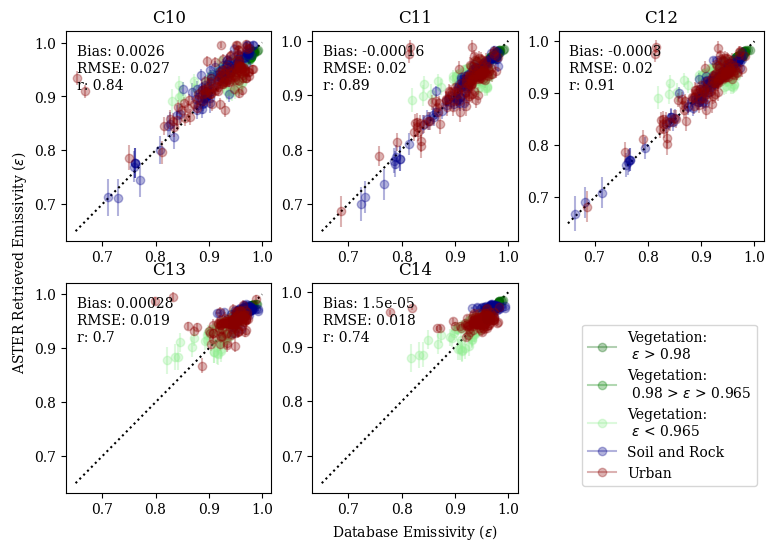

In [23]:
#text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
plt.rcParams["font.family"] = "Serif"
fig, axs = plt.subplot_mosaic(figsize=(9, 6), mosaic=[["a)", "b)", "c)"], ["d)", "e)", "f)"]])
for j, pannel in enumerate(pannels):
    for i in order:
        sca = axs[pannel].errorbar(
            all_true[i][:,j],
            all_med[i][:,j],
            yerr=all_std[i][:,j],
            fmt="o",
            color=colors[i],
            alpha=0.3,
        )

    axs[pannel].plot(
        [lower_emiss[j], 1], [lower_emiss[j], 1], linestyle="dotted", color="black"
    )
    axs[pannel].set_title(channels[j])
    axs[pannel].text(0.05,0.9,f"Bias: {lse_bias[j]:.2}", horizontalalignment='left', verticalalignment='center', transform=axs[pannel].transAxes)
    axs[pannel].text(0.05,0.82,f"RMSE: {lse_rmse[j]:.2}", horizontalalignment='left', verticalalignment='center', transform=axs[pannel].transAxes)
    axs[pannel].text(0.05,0.74,f"r: {lse_r[j]:.2}", horizontalalignment='left', verticalalignment='center', transform=axs[pannel].transAxes)
axs["f)"].set_axis_off()
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(
    labelcolor="none", which="both", top=False, bottom=False, left=False, right=False
)
plt.xlabel("Database Emissivity ($ε$)")
plt.ylabel("ASTER Retrieved Emissivity ($ε$)")
hgh_v = mlines.Line2D(
    [], [], color="DarkGreen", marker="o", alpha=0.3, label="Vegetation:\n $ε$ > 0.98"
)
med_v = mlines.Line2D(
    [], [], color="Green", marker="o", alpha=0.3, label="Vegetation:\n 0.98 > $ε$ > 0.965"
)
low_v = mlines.Line2D(
    [], [], color="LightGreen", marker="o", alpha=0.3, label="Vegetation:\n $ε$ < 0.965"
)
soil = mlines.Line2D([], [], color="DarkBlue", marker="o", alpha=0.3, label="Soil and Rock")
urban = mlines.Line2D([], [], color="DarkRed", marker="o", alpha=0.3, label="Urban")
plt.legend(handles=[hgh_v, med_v, low_v, soil, urban], loc="lower right")

In [ ]:
with open("/simulation/aster_lse_info.pkl", "rb") as f:
    aster_lse_info = pickle.load(f)


urb Masonry m.cap-Natural [60]
urb Construction  Concrete [ 8 34]
urb B001 [68]
sar Brown to dark brown gravelly loam [6]
sar Red-orange sandy soil. [14]
sar Sand Sample 1 from Orchard Supply Hardware [80]
ln_veg Ceanothus spinosus 1 [23 28 59 60]
mn_veg Leaf of Laurel (Fresh) [44]
ln_veg Acer pensylvanicum [108]

In [ ]:
truth = [
    "C10_library_LSE",
    "C11_library_LSE",
    "C12_library_LSE",
    "C13_library_LSE",
    "C14_library_LSE",
]
ret = [
    "C10_OE_retrieved_LSE",
    "C11_OE_retrieved_LSE",
    "C12_OE_retrieved_LSE",
    "C13_OE_retrieved_LSE",
    "C14_OE_retrieved_LSE",
]
ret_unc = [
    "C10_OE_retrieved_LSE_uncertainty",
    "C11_OE_retrieved_LSE_uncertainty",
    "C12_OE_retrieved_LSE_uncertainty",
    "C13_OE_retrieved_LSE_uncertainty",
    "C14_OE_retrieved_LSE_uncertainty",
]
band_strings = ["C10", "C11", "C12", "C13", "C14"]
pannels = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)", "i)"]
pannel_type = [
    aster_lse_info["urb"]["prior"], 
    aster_lse_info["urb"]["prior"], 
    aster_lse_info["urb"]["prior"], 
    aster_lse_info["sar"]["prior"], 
    aster_lse_info["sar"]["prior"], 
    aster_lse_info["sar"]["prior"], 
    aster_lse_info["veg"]["prior"]["low"], 
    aster_lse_info["veg"]["prior"]["med"], 
    aster_lse_info["veg"]["prior"]["low"],
    ]
prior_type = [
    aster_lse_info["urb"]["unc"], 
    aster_lse_info["urb"]["unc"], 
    aster_lse_info["urb"]["unc"], 
    aster_lse_info["sar"]["unc"], 
    aster_lse_info["sar"]["unc"], 
    aster_lse_info["sar"]["unc"], 
    aster_lse_info["veg"]["unc"], 
    aster_lse_info["veg"]["unc"], 
    aster_lse_info["veg"]["unc"],
    ]

urb_true_all = pd.read_csv("/simulation/urb_truth.csv")
sar_true_all = pd.read_csv("/simulation/sar_truth.csv")
ln_veg_true_all = pd.read_csv("/simulation/ln_veg_truth.csv")
mn_veg_true_all = pd.read_csv("/simulation/mn_veg_truth.csv")
hn_veg_true_all = pd.read_csv("/simulation/hn_veg_truth.csv")
truth = [
    urb_true_all.iloc[60].values[2:],
    urb_true_all.iloc[8].values[2:],
    urb_true_all.iloc[68].values[2:],
    sar_true_all.iloc[6].values[2:],
    sar_true_all.iloc[14].values[2:],
    sar_true_all.iloc[80].values[2:],
    ln_veg_true_all.iloc[23].values[2:],
    mn_veg_true_all.iloc[44].values[2:],
    ln_veg_true_all.iloc[108].values[2:],
]
retrieved = [
    urb_med[60],
    urb_med[8],
    urb_med[68],
    sar_med[6],
    sar_med[14],
    sar_med[80],
    ln_veg_med[23],
    mn_veg_med[44],
    ln_veg_med[108],
    ]


out_unc = [0.03226991,	0.028744996,	0.026817465,	0.021877473,	0.021589348]


In [138]:
# 126, 111, 132, 47, 11
mat_all_id = [60, 8, 68, 6+126, 14+126, 80+126,126+111+23,126+111+47+44,126+111+108] 

In [145]:
out_lst_diff = np.nanmedian(lst_array,axis=(0,1,3))

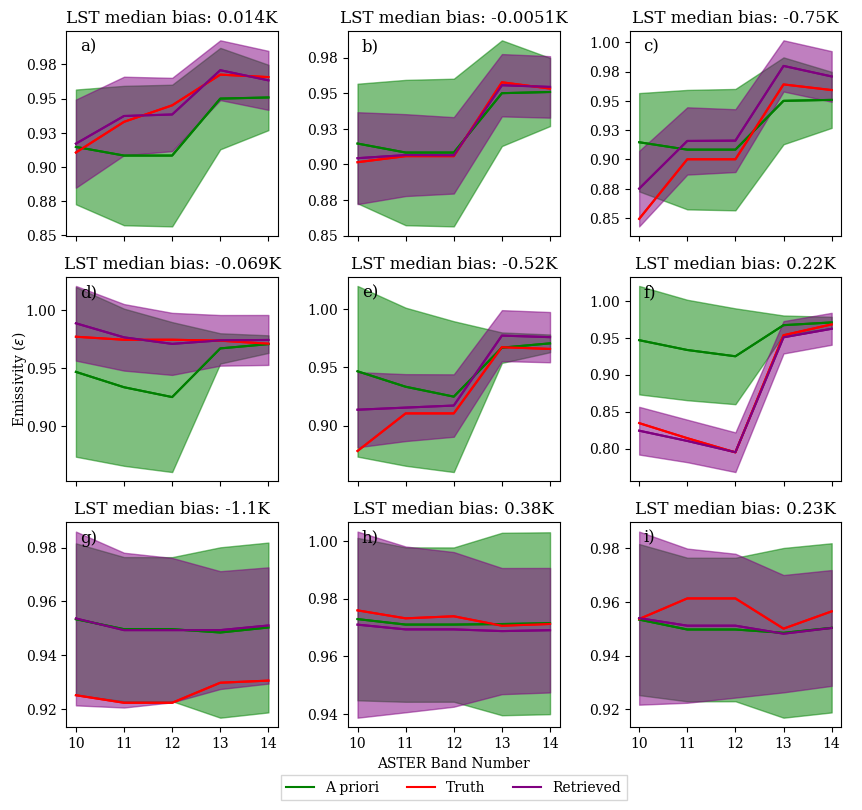

In [149]:
fig, axs = plt.subplot_mosaic(
    figsize=(10, 12),
    mosaic=[["a)", "b)", "c)"], ["d)", "e)", "f)"], ["g)", "h)", "i)"],],
    sharex=True,
)
for i, pannel in enumerate(pannels):
    axs[pannel].plot(bands,pannel_type[i], color="Green",label="prior")
    axs[pannel].plot(bands,truth[i], color="Red")
    axs[pannel].plot(bands,retrieved[i], color="Purple")
    axs[pannel].fill_between(
        bands,
        pannel_type[i] - prior_type[i],
        pannel_type[i] + prior_type[i],
        color="Green",
        alpha=0.5,
    )
    axs[pannel].fill_between(
        bands,
        retrieved[i] - out_unc,
        retrieved[i] + out_unc,
        color="Purple",
        alpha=0.5,
    )
    from matplotlib.ticker import FormatStrFormatter
    axs[pannel].plot(bands,pannel_type[i], color="Green",label="prior")
    axs[pannel].plot(bands,truth[i], color="Red")
    axs[pannel].plot(bands,retrieved[i], color="Purple")
    axs[pannel].yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
    axs[pannel].set_title(f"LST median bias: {out_lst_diff[mat_all_id[i]]:.02}K")
import matplotlib.transforms as mtransforms
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
for label, ax in axs.items():
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,fontsize='large', verticalalignment='top')
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(
    labelcolor="none", which="both", top=False, bottom=False, left=False, right=False
)


plt.xlabel("ASTER Band Number")
plt.ylabel("Emissivity ($ε$)")

fig.subplots_adjust(bottom=0.3, wspace=0.33)

axs["h)"].legend(labels=['A priori', 'Truth', 'Retrieved'],loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3)